# Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path = '/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis '
path

'/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis '

In [3]:
citidf = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibikeclean_3.csv'), index_col = False)

# Cleaning, wrangling, and subsetting

In [6]:
citidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41017 entries, 0 to 41016
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               41017 non-null  int64  
 1   weekday                  41017 non-null  object 
 2   start_hour               41017 non-null  int64  
 3   start_time               41017 non-null  object 
 4   start_station_id         41017 non-null  int64  
 5   start_station_name       41017 non-null  object 
 6   start_station_latitude   41017 non-null  float64
 7   start_station_longitude  41017 non-null  float64
 8   end_time                 41017 non-null  object 
 9   end_station_id           41017 non-null  int64  
 10  end_station_name         41017 non-null  object 
 11  end_station_latitude     41017 non-null  float64
 12  end_station_longitude    41017 non-null  float64
 13  trip_duration            41017 non-null  int64  
 14  subscriber            

In [7]:
#Changing 'start_time' data type date time
citidf['start_time']=pd.to_datetime(citidf['start_time'],infer_datetime_format=True) 

In [8]:
citidf.dtypes

Unnamed: 0                          int64
weekday                            object
start_hour                          int64
start_time                 datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_time                           object
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
trip_duration                       int64
subscriber                         object
birth_year                        float64
gender                             object
dtype: object

In [9]:
# removing time from date
citidf['start_time'] = citidf['start_time'].dt.normalize()

In [10]:
# Renaming Column
citidf.rename(columns = {'start_time' : 'start_date'}, inplace = True)

In [11]:
citidf.head()

,Unnamed: 0,weekday,start_hour,start_date,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,Mon,18,2013-09-09,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,female
1,1,Thu,18,2013-09-12,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,male
2,2,Wed,19,2013-09-18,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,male
3,3,Sat,11,2013-09-28,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,female
4,4,Fri,22,2013-09-27,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,female


In [12]:
day_counts = citidf.groupby( citidf['start_date'].dt.date)['start_date'].count()

In [13]:
day_counts

start_date
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
2013-09-06    1452
2013-09-07    1134
2013-09-08    1129
2013-09-09    1393
2013-09-10    1579
2013-09-11    1532
2013-09-12    1339
2013-09-13    1630
2013-09-14    1129
2013-09-15    1169
2013-09-16    1291
2013-09-17    1596
2013-09-18    1600
2013-09-19    1578
2013-09-20    1703
2013-09-21    1165
2013-09-22    1061
2013-09-23    1498
2013-09-24    1662
2013-09-25    1598
2013-09-26    1683
2013-09-27    1535
2013-09-28    1248
2013-09-29    1102
2013-09-30    1602
Name: start_date, dtype: int64

In [14]:
#average ride duration per day
avg_ride_duration_day = citidf.groupby('start_date')['trip_duration'].mean()

In [15]:
# looking at results
avg_ride_duration_day

start_date
2013-09-01    735.274348
2013-09-02    675.447740
2013-09-03    686.549962
2013-09-04    713.929204
2013-09-05    712.066327
2013-09-06    693.772039
2013-09-07    731.380952
2013-09-08    736.000000
2013-09-09    691.850682
2013-09-10    687.388220
2013-09-11    674.304830
2013-09-12    671.300971
2013-09-13    688.204294
2013-09-14    691.806023
2013-09-15    722.729683
2013-09-16    680.896979
2013-09-17    681.016291
2013-09-18    680.636875
2013-09-19    687.445501
2013-09-20    691.693482
2013-09-21    700.793133
2013-09-22    720.921772
2013-09-23    699.183578
2013-09-24    680.915162
2013-09-25    701.739675
2013-09-26    680.911468
2013-09-27    711.543974
2013-09-28    719.056090
2013-09-29    704.512704
2013-09-30    690.719725
Name: trip_duration, dtype: float64

In [16]:
result = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': avg_ride_duration_day.values})

In [18]:
result

,date,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327
5,2013-09-06,1452,693.772039
6,2013-09-07,1134,731.380952
7,2013-09-08,1129,736.000000
8,2013-09-09,1393,691.850682
9,2013-09-10,1579,687.388220


In [19]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [20]:
#Setting the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,ride_count,avg_duration
datetime,,
2013-09-01,729,735.274348
2013-09-02,708,675.447740
2013-09-03,1331,686.549962
2013-09-04,1469,713.929204
2013-09-05,1372,712.066327


### I selected the data points of citi bikes first month to see if it can look at trends for the following month. Keeping my focus on date and ride count.

In [22]:
# Resetting the index so that you can use the "Date" column as a filter

result_2 = result.reset_index()

In [23]:
result_2.head()

,datetime,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327


In [24]:
result_3 = result_2[['datetime','ride_count']]

In [25]:
result_3.head()

,datetime,ride_count
0,2013-09-01,729
1,2013-09-02,708
2,2013-09-03,1331
3,2013-09-04,1469
4,2013-09-05,1372


In [26]:
# Resetting index so that you can use the "Date" column as a filter

result_3 = result.reset_index()

In [27]:
result_3.head()

,datetime,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327


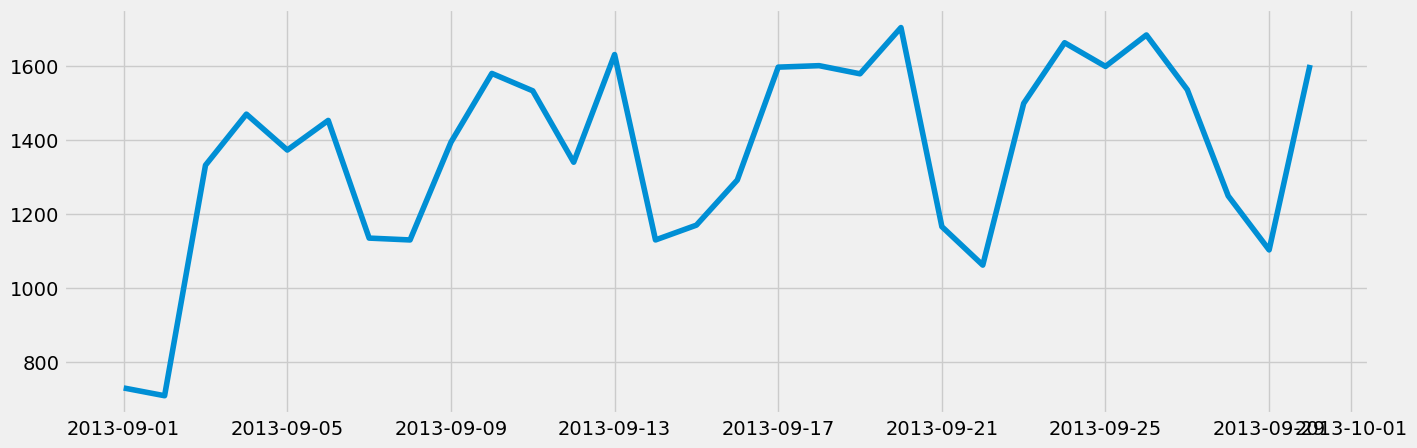

In [28]:
# Plotting the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

In [29]:
day_counts.head()

start_date
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
Name: start_date, dtype: int64

In [30]:
# Checking for any missing values (you shouldn't have any)

day_counts.isnull().sum() 

0

# Time series analysis- decomposition

In [31]:
result.head()

,ride_count,avg_duration
datetime,,
2013-09-01,729,735.274348
2013-09-02,708,675.447740
2013-09-03,1331,686.549962
2013-09-04,1469,713.929204
2013-09-05,1372,712.066327


In [32]:
# Dropping avg_duration
column_to_drop = 'avg_duration'

In [33]:
result = result.drop(column_to_drop, axis=1)
#Checking result
result

,ride_count
datetime,
2013-09-01,729
2013-09-02,708
2013-09-03,1331
2013-09-04,1469
2013-09-05,1372
2013-09-06,1452
2013-09-07,1134
2013-09-08,1129
2013-09-09,1393


In [34]:
# Resetting index so that you can use the "Date" column as a filter

result_1 = result.reset_index()

In [35]:
result_1.head()

,datetime,ride_count
0,2013-09-01,729
1,2013-09-02,708
2,2013-09-03,1331
3,2013-09-04,1469
4,2013-09-05,1372


In [36]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    30 non-null     datetime64[ns]
 1   ride_count  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 608.0 bytes


In [37]:
time_series = result_1['ride_count']

In [38]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [39]:
result_1.set_index('datetime', inplace=True)

In [40]:
result_1.index.freq = 'D'

In [41]:
time_series = result_1['ride_count']

In [42]:
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')

In [43]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

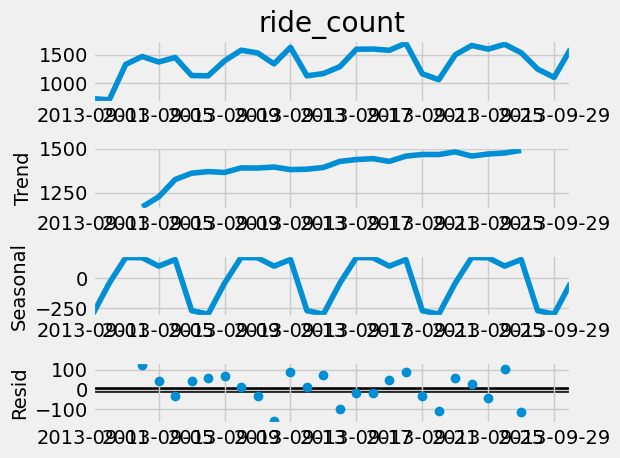

In [44]:
# Plotting the separate components

decomposition.plot()
plt.show()

In [45]:
result_1.head()

,ride_count
datetime,
2013-09-01,729
2013-09-02,708
2013-09-03,1331
2013-09-04,1469
2013-09-05,1372


### By the looks of the graph the trend seems to be increasing signifying that there will be more riders as the month goes on.

### The level and trend differ, so smoothing should take place.

### There is definitley some seasonality to it .

# Testing Stationarity

In [46]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.728335
p-value                         0.003732
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


### Looking at the p-value I see that the test statistic is much smaller than the critical value ( 5-10% value) meaning I have a satisfactory p-value which disproves that there is a unit root meaning it's stationary.

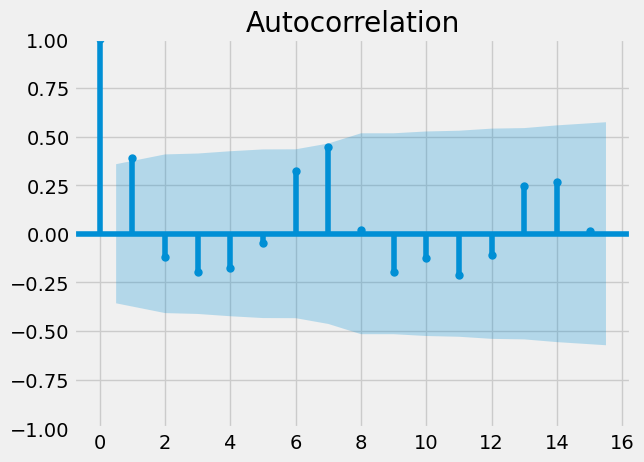

In [47]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

In [48]:
# saving to csv
citidf.to_csv(os.path.join(path, '02 Data','Prepared Data', 'citibikeclean_4.csv'))